# Importing the Datas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1=pd.read_csv('/content/NO20_21.csv')
df2=pd.read_excel('/content/NO1Sep22-1Sep23.xlsx')

In [ ]:
print(df1.head())
print(df2.head())

       Date;Value;Measurement
0  31-12-2020 01:00;2.984;KWH
1   31-12-2020 02:00;2.86;KWH
2      31-12-2020 03:00;4;KWH
3   31-12-2020 04:00;1.89;KWH
4  31-12-2020 05:00;3.552;KWH
                   dt   values
0 2022-09-01 00:00:00  4312.00
1 2022-09-01 01:00:00  4356.00
2 2022-09-01 02:00:00     4.56
3 2022-09-01 03:00:00  4464.00
4 2022-09-01 04:00:00  4572.00


# Changing the DF1

In [ ]:
df1[['Dates','Value','Measurement']]=df1['Date;Value;Measurement'].str.split(';',expand=True)
df1=df1.drop(columns='Date;Value;Measurement')
df1[['Date','Time']]=df1['Dates'].str.split(' ',expand=True)
df1=df1.drop(columns='Dates')
df1[['date','month','year']]=df1['Date'].str.split('-',expand=True)
df1=df1.drop(columns='Date')
df1[['hour','minutes']]=df1['Time'].str.split(':',expand=True)
df1=df1.drop(columns=['Time','minutes','Measurement'])
df1.rename(columns={'Value':'values'},inplace=True)
df1.drop(df1.index[0:23], inplace=True)
df1.drop(df1.index[-1], inplace=True)
df1=df1.reset_index(drop=True)
df1['values'] = df1['values'].astype(float)
df1['values'] *= 1000
df1

,values,date,month,year,hour
0,3684.0,01,01,2021,00
1,2578.0,01,01,2021,01
2,3748.0,01,01,2021,02
3,1954.0,01,01,2021,03
4,3262.0,01,01,2021,04
...,...,...,...,...,...
8755,7886.0,31,12,2021,19
8756,1914.0,31,12,2021,20
8757,3018.0,31,12,2021,21
8758,1946.0,31,12,2021,22


# Changing the DF1

In [ ]:
df1 = df1.drop_duplicates()
df1 = df1.drop(index=7275)
row_data = {
    'hour': 3,
    'date': 28,
    'month': 3,'year' : 2021, 'values': df1[(df1['hour'] == '02') & (df1['date'] == '28') & (df1['month'] == '03')].iloc[0]['values']
}
df1['date']=df1['date'].astype(int)
df1['month']=df1['month'].astype(int)
df1['hour']=df1['hour'].astype(int)
df1.loc[len(df1)]=row_data
df1 = df1.sort_values(by=['month', 'date', 'hour'])
df1 = df1.reset_index(drop=True)
row_data={
    'hour': 23,
    'date': 31,
    'month': 12 ,'year': 2021,'values':2000
}
df1.loc[len(df1)]=row_data
df1

,values,date,month,year,hour
0,3684.0,1,1,2021,0
1,2578.0,1,1,2021,1
2,3748.0,1,1,2021,2
3,1954.0,1,1,2021,3
4,3262.0,1,1,2021,4
...,...,...,...,...,...
8755,7886.0,31,12,2021,19
8756,1914.0,31,12,2021,20
8757,3018.0,31,12,2021,21
8758,1946.0,31,12,2021,22


# Checking if all the enteries are right

In [ ]:
df1[df1['month']==2].count()

values    672
date      672
month     672
year      672
hour      672
dtype: int64

# Changing the df2

In [ ]:
df2

,dt,values
0,2022-09-01 00:00:00,4312.00
1,2022-09-01 01:00:00,4356.00
2,2022-09-01 02:00:00,4.56
3,2022-09-01 03:00:00,4464.00
4,2022-09-01 04:00:00,4572.00
...,...,...
8730,2023-08-31 19:00:00,2988.00
8731,2023-08-31 20:00:00,3568.00
8732,2023-08-31 21:00:00,4572.00
8733,2023-08-31 22:00:00,4.60


In [ ]:
for i in range (0,8735):
  if((df2['values'].iloc[i])<100):
    df2.loc[i,'values']=(df2.loc[i,'values']*10000)
  df2

In [ ]:
df2

,dt,values
0,2022-09-01 00:00:00,4312.0
1,2022-09-01 01:00:00,4356.0
2,2022-09-01 02:00:00,45600.0
3,2022-09-01 03:00:00,4464.0
4,2022-09-01 04:00:00,4572.0
...,...,...
8730,2023-08-31 19:00:00,2988.0
8731,2023-08-31 20:00:00,3568.0
8732,2023-08-31 21:00:00,4572.0
8733,2023-08-31 22:00:00,46000.0


In [ ]:
df2['date']=df2['dt'].dt.day
df2['month']=df2['dt'].dt.month
df2['year']=df2['dt'].dt.year
df2['hour']=df2['dt'].dt.hour
df2=df2.drop(columns='dt')
df2

,values,date,month,year,hour
0,4312.0,1,9,2022,0
1,4356.0,1,9,2022,1
2,45600.0,1,9,2022,2
3,4464.0,1,9,2022,3
4,4572.0,1,9,2022,4
...,...,...,...,...,...
8730,2988.0,31,8,2023,19
8731,3568.0,31,8,2023,20
8732,4572.0,31,8,2023,21
8733,46000.0,31,8,2023,22


# Including the _ days of the DF2

In [ ]:
df2['month'].value_counts()

month
12    744
1     744
5     744
7     744
8     744
3     743
9     720
10    720
11    720
4     720
6     720
2     672
Name: count, dtype: int64

In [ ]:
df2[df2['month']==10]['date'].value_counts()

date
1     24
2     24
29    24
28    24
27    24
26    24
25    24
24    24
23    24
22    24
21    24
20    24
19    24
18    24
17    24
16    24
15    24
14    24
13    24
12    24
11    24
10    24
9     24
8     24
7     24
6     24
5     24
4     24
3     24
31    24
Name: count, dtype: int64

In [ ]:
df2[df2['month']==3]['date'].value_counts()

date
1     24
2     24
30    24
29    24
28    24
27    24
25    24
24    24
23    24
22    24
21    24
20    24
19    24
18    24
17    24
16    24
15    24
14    24
13    24
12    24
11    24
10    24
9     24
8     24
7     24
6     24
5     24
4     24
3     24
31    24
26    23
Name: count, dtype: int64

In [ ]:
df2[(df2['month']==3) & (df2['date']==26)]['hour'].value_counts()

hour
0     1
12    1
21    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
11    1
1     1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
22    1
Name: count, dtype: int64

In [ ]:
for i in range (0,24):
  # october_30_data=(df2[df2['month']==10][df2['date']==31][df2['hour']==i])
  october_30_data={
      'month': 10,
      'date': 30,
      'hour': i,
      'values': df2.loc[i,'values'],
      'year': 2022
  }
  df2.loc[len(df2)]=october_30_data
march_26_data={
    'month' : 3,
    'date': 26,
    'hour':12,
    'values':df2.loc[11,'values'],
    'year':2022
}
df2.loc[len(df2)]=march_26_data
df2.sort_values(by=['month','date','hour'], inplace=True)
df2=df2.reset_index(drop=True)
df2

,values,date,month,year,hour
0,4428.0,1,1,2023,0
1,4220.0,1,1,2023,1
2,4084.0,1,1,2023,2
3,6180.0,1,1,2023,3
4,4300.0,1,1,2023,4
...,...,...,...,...,...
8755,10180.0,31,12,2022,19
8756,4484.0,31,12,2022,20
8757,4356.0,31,12,2022,21
8758,4384.0,31,12,2022,22


#Making it years campatible

In [ ]:
df_2021=df1
df_2023=df2[0:5832]
df_2022=df2[5832:8760]
df_2022

,values,date,month,year,hour
5832,4312.0,1,9,2022,0
5833,4356.0,1,9,2022,1
5834,45600.0,1,9,2022,2
5835,4464.0,1,9,2022,3
5836,4572.0,1,9,2022,4
...,...,...,...,...,...
8755,10180.0,31,12,2022,19
8756,4484.0,31,12,2022,20
8757,4356.0,31,12,2022,21
8758,4384.0,31,12,2022,22


In [ ]:
df_2023

,values,date,month,year,hour
0,4428.0,1,1,2023,0
1,4220.0,1,1,2023,1
2,4084.0,1,1,2023,2
3,6180.0,1,1,2023,3
4,4300.0,1,1,2023,4
...,...,...,...,...,...
5827,2988.0,31,8,2023,19
5828,3568.0,31,8,2023,20
5829,4572.0,31,8,2023,21
5830,46000.0,31,8,2023,22


# Extrapolating the 2022 using the 2023 and 2021

In [ ]:
df_2022
df_2022=df_2022.reset_index(drop=True)
df_2022

,values,date,month,year,hour
0,4312.0,1,9,2022,0
1,4356.0,1,9,2022,1
2,45600.0,1,9,2022,2
3,4464.0,1,9,2022,3
4,4572.0,1,9,2022,4
...,...,...,...,...,...
2923,10180.0,31,12,2022,19
2924,4484.0,31,12,2022,20
2925,4356.0,31,12,2022,21
2926,4384.0,31,12,2022,22


In [ ]:
new_rows_data=pd.DataFrame(columns=['hour','date','year','values'])
for i in range (0,5832):
  df_2022.loc[2928+i,'hour']=df_2023.iloc[i]['hour']
  df_2022.loc[2928+i,'date']=df_2023.iloc[i]['date']
  df_2022.loc[2928+i,'year']=2022
  df_2022.loc[2928+i,'month']=df_2023.iloc[i]['month']
  df_2022.loc[2928+i,'values']=(((float(df_2023.iloc[i]['values']))+float(df_2021.iloc[i]['values']))/2)
df_2022.sort_values(by=['month','date','hour'], inplace=True)
df_2022=df_2022.reset_index(drop=True)
df_2022

,values,date,month,year,hour
0,4056.0,1.0,1.0,2022.0,0.0
1,3399.0,1.0,1.0,2022.0,1.0
2,3916.0,1.0,1.0,2022.0,2.0
3,4067.0,1.0,1.0,2022.0,3.0
4,3781.0,1.0,1.0,2022.0,4.0
...,...,...,...,...,...
8755,10180.0,31.0,12.0,2022.0,19.0
8756,4484.0,31.0,12.0,2022.0,20.0
8757,4356.0,31.0,12.0,2022.0,21.0
8758,4384.0,31.0,12.0,2022.0,22.0


#Extrapolating the 2023 using the 2022 and 2021

In [ ]:
df_2023

,values,date,month,year,hour
0,4428.0,1,1,2023,0
1,4220.0,1,1,2023,1
2,4084.0,1,1,2023,2
3,6180.0,1,1,2023,3
4,4300.0,1,1,2023,4
...,...,...,...,...,...
5827,2988.0,31,8,2023,19
5828,3568.0,31,8,2023,20
5829,4572.0,31,8,2023,21
5830,46000.0,31,8,2023,22


In [ ]:
df_2021

,values,date,month,year,hour
0,3684.0,1,1,2021,0
1,2578.0,1,1,2021,1
2,3748.0,1,1,2021,2
3,1954.0,1,1,2021,3
4,3262.0,1,1,2021,4
...,...,...,...,...,...
8755,7886.0,31,12,2021,19
8756,1914.0,31,12,2021,20
8757,3018.0,31,12,2021,21
8758,1946.0,31,12,2021,22


In [ ]:
new_rows_data=[]
for i in range (5832,8760):
  df_2023.loc[i,'hour']=df_2022.iloc[i]['hour']
  df_2023.loc[i,'date']=df_2022.iloc[i]['date']
  df_2023.loc[i,'year']=2023
  df_2023.loc[i,'month']=df_2022.iloc[i]['month']
  df_2023.loc[i,'values']=(2*float(df_2022.iloc[i]['values']))-float(df_2021.iloc[i]['values'])
  # new_row_data={'hour':df_2022.iloc[i]['hour'],'date':df_2022.iloc[i]['date'],'year':2023,'month':df_2022.iloc[i]['month'],'values':(2*float(df_2022.iloc[i]['values']))-float(df_2021.iloc[i]['values'])}
  # new_rows_data.append(new_row_data)
# df_2023=df_2023.append(new_rows_data,ignore_index=True)
df_2023.sort_values(by=['month','date','hour'], inplace=True)
df_2023=df_2023.reset_index(drop=True)
df_2023

<ipython-input-312-8e90baf57f4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023.loc[i,'hour']=df_2022.iloc[i]['hour']


,values,date,month,year,hour
0,4428.0,1.0,1.0,2023.0,0.0
1,4220.0,1.0,1.0,2023.0,1.0
2,4084.0,1.0,1.0,2023.0,2.0
3,6180.0,1.0,1.0,2023.0,3.0
4,4300.0,1.0,1.0,2023.0,4.0
...,...,...,...,...,...
8755,12474.0,31.0,12.0,2023.0,19.0
8756,7054.0,31.0,12.0,2023.0,20.0
8757,5694.0,31.0,12.0,2023.0,21.0
8758,6822.0,31.0,12.0,2023.0,22.0


#Extrapolating the 2020,2019,2018 using 2021,2022,2023

In [ ]:
import pandas as pd

# Create empty DataFrames for years 2020, 2019, and 2018
df_2020 = pd.DataFrame()
df_2019 = pd.DataFrame()
df_2018 = pd.DataFrame()

# Loop through the range of indices
for i in range(0, 8760):
    # Calculate values for the respective years
    values_2020 = ((2 * float(df_2021.iloc[i]['values'])) - (float(df_2022.iloc[i]['values'])))
    values_2019 = ((2 * values_2020) - (float(df_2021.iloc[i]['values'])))
    values_2018 = ((2 * values_2019) - (values_2020))


    df_2020.loc[i,'hour']=df_2021.iloc[i]['hour']
    df_2020.loc[i,'month']=df_2021.iloc[i]['month']
    df_2020.loc[i,'date']=df_2021.iloc[i]['date']
    df_2020.loc[i,'year']=2020
    df_2020.loc[i,'values']=values_2020


    df_2019.loc[i,'hour']=df_2020.iloc[i]['hour']
    df_2019.loc[i,'month']=df_2020.iloc[i]['month']
    df_2019.loc[i,'date']=df_2020.iloc[i]['date']
    df_2019.loc[i,'year']=2019
    df_2019.loc[i,'values']=values_2019

    df_2018.loc[i,'hour']=df_2020.iloc[i]['hour']
    df_2018.loc[i,'month']=df_2020.iloc[i]['month']
    df_2018.loc[i,'date']=df_2020.iloc[i]['date']
    df_2018.loc[i,'year']=2018
    df_2018.loc[i,'values']=values_2018

print("DataFrame for 2023:")
print(df_2023)
print("DataFrame for 2022:")
print(df_2022)
print("DataFrame for 2021:")
print(df_2021)
print("DataFrame for 2020:")
print(df_2020)
print("\nDataFrame for 2019:")
print(df_2019)
print("\nDataFrame for 2018:")
print(df_2018)
# df_2021.to_csv('df_NO_2021.csv', index=False)
# df_2022.to_csv('df_NO_2022.csv', index=False)

DataFrame for 2023:
       values  date  month    year  hour
0      4428.0   1.0    1.0  2023.0   0.0
1      4220.0   1.0    1.0  2023.0   1.0
2      4084.0   1.0    1.0  2023.0   2.0
3      6180.0   1.0    1.0  2023.0   3.0
4      4300.0   1.0    1.0  2023.0   4.0
...       ...   ...    ...     ...   ...
8755  12474.0  31.0   12.0  2023.0  19.0
8756   7054.0  31.0   12.0  2023.0  20.0
8757   5694.0  31.0   12.0  2023.0  21.0
8758   6822.0  31.0   12.0  2023.0  22.0
8759  10520.0  31.0   12.0  2023.0  23.0

[8760 rows x 5 columns]
DataFrame for 2022:
       values  date  month    year  hour
0      4056.0   1.0    1.0  2022.0   0.0
1      3399.0   1.0    1.0  2022.0   1.0
2      3916.0   1.0    1.0  2022.0   2.0
3      4067.0   1.0    1.0  2022.0   3.0
4      3781.0   1.0    1.0  2022.0   4.0
...       ...   ...    ...     ...   ...
8755  10180.0  31.0   12.0  2022.0  19.0
8756   4484.0  31.0   12.0  2022.0  20.0
8757   4356.0  31.0   12.0  2022.0  21.0
8758   4384.0  31.0   12.0  2022.

# Table for the NO (6* 8760)

In [ ]:
import pandas as pd
mixed_df=pd.DataFrame()
mixed_df['date']=df_2023['date']
mixed_df['month']=df_2023['month']
mixed_df['hour']=df_2023['hour']
mixed_df['values_2023']=df_2023['values'].astype(float).round(2)
mixed_df['values_2022']=df_2022['values'].astype(float).round(2)
mixed_df['values_2021']=df_2021['values'].astype(float).round(2)
mixed_df['values_2020']=df_2020['values'].astype(float).round(2)
mixed_df['values_2019']=df_2019['values'].astype(float).round(2)
mixed_df['values_2018']=df_2018['values'].astype(float).round(2)
mixed_df

,date,month,hour,values_2023,values_2022,values_2021,values_2020,values_2019,values_2018
0,1.0,1.0,0.0,4428.0,4056.0,3684.0,3312.0,2940.0,2568.0
1,1.0,1.0,1.0,4220.0,3399.0,2578.0,1757.0,936.0,115.0
2,1.0,1.0,2.0,4084.0,3916.0,3748.0,3580.0,3412.0,3244.0
3,1.0,1.0,3.0,6180.0,4067.0,1954.0,-159.0,-2272.0,-4385.0
4,1.0,1.0,4.0,4300.0,3781.0,3262.0,2743.0,2224.0,1705.0
...,...,...,...,...,...,...,...,...,...
8755,31.0,12.0,19.0,12474.0,10180.0,7886.0,5592.0,3298.0,1004.0
8756,31.0,12.0,20.0,7054.0,4484.0,1914.0,-656.0,-3226.0,-5796.0
8757,31.0,12.0,21.0,5694.0,4356.0,3018.0,1680.0,342.0,-996.0
8758,31.0,12.0,22.0,6822.0,4384.0,1946.0,-492.0,-2930.0,-5368.0


#Random Graph Generator

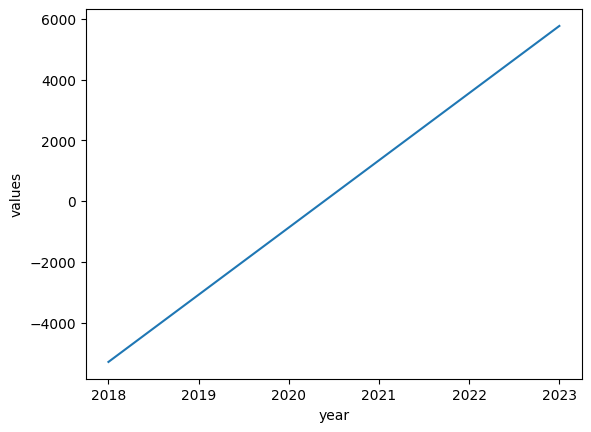

In [ ]:
import matplotlib.pyplot as plt
import random
i=random.randint(0, 8759)
y_values=[mixed_df['values_2018'].iloc[i],mixed_df['values_2019'].iloc[i],mixed_df['values_2020'].iloc[i],mixed_df['values_2021'].iloc[i],mixed_df['values_2022'].iloc[i],mixed_df['values_2023'].iloc[i]]
x_values=[2018,2019,2020,2021,2022,2023]
plt.plot(x_values,y_values)
plt.xlabel('year')
plt.ylabel('values')
plt.show()

# Importing the Producers Data(DK1)

In [ ]:
# Changes so that i can run easliy on the second set
import pandas as pd
DK1_2018=pd.read_excel("/content/ElectricityBalanceNonvDK1_1_2018_30_12_2018.xlsx")
DK1_2019=pd.read_excel("/content/ElectricityBalanceNonv DK1_1_1_2019_30_12_2019.xlsx")
DK1_2020=pd.read_excel("/content/ElectricityBalanceNonv DK1_1_1_20_30_12_20.xlsx")
DK1_2021=pd.read_excel('/content/ElectricityBalanceNonv 1_1_21_30_12_21.xlsx')
DK1_2022=pd.read_excel("/content/ElectricityBalanceNonv DK1_1_1_22_30_12_22.xlsx")
DK1_2023=pd.read_excel("/content/ElectricityBalanceNonv DK1_1_1_23_30_12_23.xlsx")

# Changing the Datas(DK1)

In [ ]:
def processed_dfs(start_year,end_year,df):
  start_date=pd.to_datetime(f'{start_year}-01-01')
  end_date=pd.to_datetime(f'{end_year}-01-01')
  complete_data_range=pd.date_range(start=start_date,end=end_date, freq='H')
  complete_df=pd.DataFrame({'HourUTC':complete_data_range})
  complete_df=complete_df.drop(complete_df.tail(1).index)
  df=pd.merge(complete_df,df,on='HourUTC',how='left')
  df.fillna(0,inplace=True)
  df['HourUTC'] = df['HourUTC'].astype(str)
  df[['dates', 'time']] = df['HourUTC'].str.split(' ', expand=True)
  df[['year','month','date']]=df['dates'].str.split('-',expand=True)
  df[['hour','minutes','seconds']]=df['time'].str.split(':',expand=True)
  df=df.drop(columns=['seconds','minutes','time','dates','HourUTC','PriceArea','HourDK'])
  return df

In [ ]:
DK1_2018=processed_dfs(2018,2019,DK1_2018)
DK1_2019=processed_dfs(2019,2020,DK1_2019)
DK1_2020=processed_dfs(2020,2021,DK1_2020)
DK1_2021=processed_dfs(2021,2022,DK1_2021)
DK1_2022=processed_dfs(2022,2023,DK1_2022)
DK1_2023=processed_dfs(2023,2024,DK1_2023)
DK1_2020 = DK1_2020[(DK1_2020['month'] != '02') | (DK1_2020['date'] != '29')]
DK1_2020=DK1_2020.reset_index(drop=True)
print("DK1_2018")
print(DK1_2018)
print("DK1_2019")
print(DK1_2019)
print("DK1_2020")
print(DK1_2020)
print("DK1_2021")
print(DK1_2021)
print("DK1_2022")
print(DK1_2022)
print("DK1_2023")
print(DK1_2023)

DK1_2018
        TotalLoad  year month date hour
0     1741.920044  2018    01   01   00
1     1657.520020  2018    01   01   01
2     1594.260010  2018    01   01   02
3     1535.880005  2018    01   01   03
4     1505.069946  2018    01   01   04
...           ...   ...   ...  ...  ...
8755     0.000000  2018    12   31   19
8756     0.000000  2018    12   31   20
8757     0.000000  2018    12   31   21
8758     0.000000  2018    12   31   22
8759     0.000000  2018    12   31   23

[8760 rows x 5 columns]
DK1_2019
        TotalLoad  year month date hour
0     1837.709961  2019    01   01   00
1     1778.859985  2019    01   01   01
2     1726.380005  2019    01   01   02
3     1709.619995  2019    01   01   03
4     1716.390015  2019    01   01   04
...           ...   ...   ...  ...  ...
8755     0.000000  2019    12   31   19
8756     0.000000  2019    12   31   20
8757     0.000000  2019    12   31   21
8758     0.000000  2019    12   31   22
8759     0.000000  2019    12   31   

# Mixed df of the Producers(DK1)

In [ ]:
producer_mixed_df=pd.DataFrame()
producer_mixed_df['date']=DK1_2018['date']
producer_mixed_df['month']=DK1_2018['month']
producer_mixed_df['hour']=DK1_2018['hour']
producer_mixed_df['2018_values']=DK1_2018['TotalLoad'].astype(float).round(2)
producer_mixed_df['2019_values']=DK1_2019['TotalLoad'].astype(float).round(2)
producer_mixed_df['2020_values']=DK1_2020['TotalLoad'].astype(float).round(2)
producer_mixed_df['2021_values']=DK1_2021['TotalLoad'].astype(float).round(2)
producer_mixed_df['2022_values']=DK1_2022['TotalLoad'].astype(float).round(2)
producer_mixed_df['2023_values']=DK1_2023['TotalLoad'].astype(float).round(2)
producer_mixed_df

,date,month,hour,2018_values,2019_values,2020_values,2021_values,2022_values,2023_values
0,01,01,00,1741.92,1837.71,1892.60,2042.82,1339.80,2122.85
1,01,01,01,1657.52,1778.86,1830.97,1966.48,1283.86,2127.72
2,01,01,02,1594.26,1726.38,1782.09,1915.50,1243.84,2026.24
3,01,01,03,1535.88,1709.62,1745.69,1892.50,1229.96,1985.67
4,01,01,04,1505.07,1716.39,1781.79,1903.26,1200.01,1974.77
...,...,...,...,...,...,...,...,...,...
8755,31,12,19,0.00,0.00,0.00,0.00,0.00,0.00
8756,31,12,20,0.00,0.00,0.00,0.00,0.00,0.00
8757,31,12,21,0.00,0.00,0.00,0.00,0.00,0.00
8758,31,12,22,0.00,0.00,0.00,0.00,0.00,0.00


# Importing the Producers Datas(DK2)

In [ ]:
DK2_2018=pd.read_excel("/content/ElectricityBalanceNonv DK2_1_1_201830_12_2018.xlsx")
DK2_2019=pd.read_excel("/content/ElectricityBalanceNonv DK2_1_1_2019_30_12_2019.xlsx")
DK2_2020=pd.read_excel("/content/ElectricityBalanceNonv Dk2_1_1_20_30_12_20.xlsx")
DK2_2021=pd.read_excel('/content/ElectricityBalanceNonv _DK2_1_1_21_30_12_21.xlsx')
DK2_2022=pd.read_excel("/content/ElectricityBalanceNonv DK1_1_1_22_30_12_22.xlsx")
DK2_2023=pd.read_excel("/content/ElectricityBalanceNonvDk2_1_1_23_30_12_23.xlsx")

# Changing the datas of Producers(DK2)

In [ ]:
def processed_dfs(start_year,end_year,df):
  start_date=pd.to_datetime(f'{start_year}-01-01')
  end_date=pd.to_datetime(f'{end_year}-01-01')
  complete_data_range=pd.date_range(start=start_date,end=end_date, freq='H')
  complete_df=pd.DataFrame({'HourUTC':complete_data_range})
  complete_df=complete_df.drop(complete_df.tail(1).index)
  df=pd.merge(complete_df,df,on='HourUTC',how='left')
  df.fillna(0,inplace=True)
  df['HourUTC'] = df['HourUTC'].astype(str)
  df[['dates', 'time']] = df['HourUTC'].str.split(' ', expand=True)
  df[['year','month','date']]=df['dates'].str.split('-',expand=True)
  df[['hour','minutes','seconds']]=df['time'].str.split(':',expand=True)
  df=df.drop(columns=['seconds','minutes','time','dates','HourUTC','PriceArea','HourDK'])
  return df

In [ ]:
DK2_2018=processed_dfs(2018,2019,DK2_2018)
DK2_2019=processed_dfs(2019,2020,DK2_2019)
DK2_2020=processed_dfs(2020,2021,DK2_2020)
DK2_2021=processed_dfs(2021,2022,DK2_2021)
DK2_2022=processed_dfs(2022,2023,DK2_2022)
DK2_2023=processed_dfs(2023,2024,DK2_2023)
DK2_2020 = DK2_2020[(DK2_2020['month'] != '02') | (DK2_2020['date'] != '29')]
DK2_2020=DK2_2020.reset_index(drop=True)
print("DK2_2018")
print(DK2_2018)
print("DK2_2019")
print(DK2_2019)
print("DK2_2020")
print(DK2_2020)
print("DK2_2021")
print(DK2_2021)
print("DK2_2022")
print(DK2_2022)
print("DK2_2023")
print(DK2_2023)

DK2_2018
        TotalLoad  year month date hour
0     1566.119995  2018    01   01   00
1     1460.449951  2018    01   01   01
2     1423.790039  2018    01   01   02
3     1380.469971  2018    01   01   03
4     1297.329956  2018    01   01   04
...           ...   ...   ...  ...  ...
8755     0.000000  2018    12   31   19
8756     0.000000  2018    12   31   20
8757     0.000000  2018    12   31   21
8758     0.000000  2018    12   31   22
8759     0.000000  2018    12   31   23

[8760 rows x 5 columns]
DK2_2019
        TotalLoad  year month date hour
0     1348.329956  2019    01   01   00
1     1291.209961  2019    01   01   01
2     1239.810059  2019    01   01   02
3     1223.859985  2019    01   01   03
4     1224.250000  2019    01   01   04
...           ...   ...   ...  ...  ...
8755     0.000000  2019    12   31   19
8756     0.000000  2019    12   31   20
8757     0.000000  2019    12   31   21
8758     0.000000  2019    12   31   22
8759     0.000000  2019    12   31   

# Mixed df of the Producers(DK2)

In [ ]:
df_2018

,hour,month,date,year,values
0,0.0,1.0,1.0,2018.0,2568.0
1,1.0,1.0,1.0,2018.0,115.0
2,2.0,1.0,1.0,2018.0,3244.0
3,3.0,1.0,1.0,2018.0,-4385.0
4,4.0,1.0,1.0,2018.0,1705.0
...,...,...,...,...,...
8755,19.0,12.0,31.0,2018.0,1004.0
8756,20.0,12.0,31.0,2018.0,-5796.0
8757,21.0,12.0,31.0,2018.0,-996.0
8758,22.0,12.0,31.0,2018.0,-5368.0


In [ ]:
producer_mixed_df2=pd.DataFrame()
producer_mixed_df2['date']=DK2_2018['date']
producer_mixed_df2['month']=DK2_2018['month']
producer_mixed_df2['hour']=DK2_2018['hour']
producer_mixed_df2['2018_values']=DK2_2018['TotalLoad'].astype(float).round(2)
producer_mixed_df2['2019_values']=DK2_2019['TotalLoad'].astype(float).round(2)
producer_mixed_df2['2020_values']=DK2_2020['TotalLoad'].astype(float).round(2)
producer_mixed_df2['2021_values']=DK2_2021['TotalLoad'].astype(float).round(2)
producer_mixed_df2['2022_values']=DK2_2022['TotalLoad'].astype(float).round(2)
producer_mixed_df2['2023_values']=DK2_2023['TotalLoad'].astype(float).round(2)
producer_mixed_df2

,date,month,hour,2018_values,2019_values,2020_values,2021_values,2022_values,2023_values
0,01,01,00,1566.12,1348.33,1337.38,1363.04,1339.80,1266.10
1,01,01,01,1460.45,1291.21,1293.37,1309.83,1283.86,1214.75
2,01,01,02,1423.79,1239.81,1241.41,1260.21,1243.84,1166.02
3,01,01,03,1380.47,1223.86,1197.14,1231.28,1229.96,1121.30
4,01,01,04,1297.33,1224.25,1183.64,1234.17,1200.01,1098.68
...,...,...,...,...,...,...,...,...,...
8755,31,12,19,0.00,0.00,0.00,0.00,0.00,0.00
8756,31,12,20,0.00,0.00,0.00,0.00,0.00,0.00
8757,31,12,21,0.00,0.00,0.00,0.00,0.00,0.00
8758,31,12,22,0.00,0.00,0.00,0.00,0.00,0.00


# Calculating the Covariance of the DK1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats import pearsonr

In [ ]:
from scipy.stats import pearsonr

covariance_df = pd.DataFrame()
covariance_df['date'] = df_2018['date']
covariance_df['month'] = df_2018['month']
covariance_df['hour'] = df_2018['hour']
for i in range(0, 8760):
    row1 = mixed_df.iloc[i].drop(['month', 'date', 'hour']).astype(float)
    row2 = producer_mixed_df.iloc[i].drop(['month', 'date', 'hour']).astype(float)
    row3 = producer_mixed_df2.iloc[i].drop(['month', 'date', 'hour']).astype(float)
    covariance_df.loc[i, 'covariance_value_with_DK1'] = pearsonr(row1, row2)[0]
    covariance_df.loc[i, 'covariance_value_with_DK2'] = pearsonr(row1, row3)[0]
covariance_df.reset_index(drop=True, inplace=True)
covariance_df

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coeffic

,date,month,hour,covariance_value_with_DK1,covariance_value_with_DK2
0,1.0,1.0,0.0,-0.108361,0.788109
1,1.0,1.0,1.0,-0.184874,0.811804
2,1.0,1.0,2.0,-0.164347,0.785533
3,1.0,1.0,3.0,-0.188762,0.787958
4,1.0,1.0,4.0,-0.172009,0.827331
...,...,...,...,...,...
8755,31.0,12.0,19.0,NaN,NaN
8756,31.0,12.0,20.0,NaN,NaN
8757,31.0,12.0,21.0,NaN,NaN
8758,31.0,12.0,22.0,NaN,NaN


# Plotting the Graphs(Histograms)

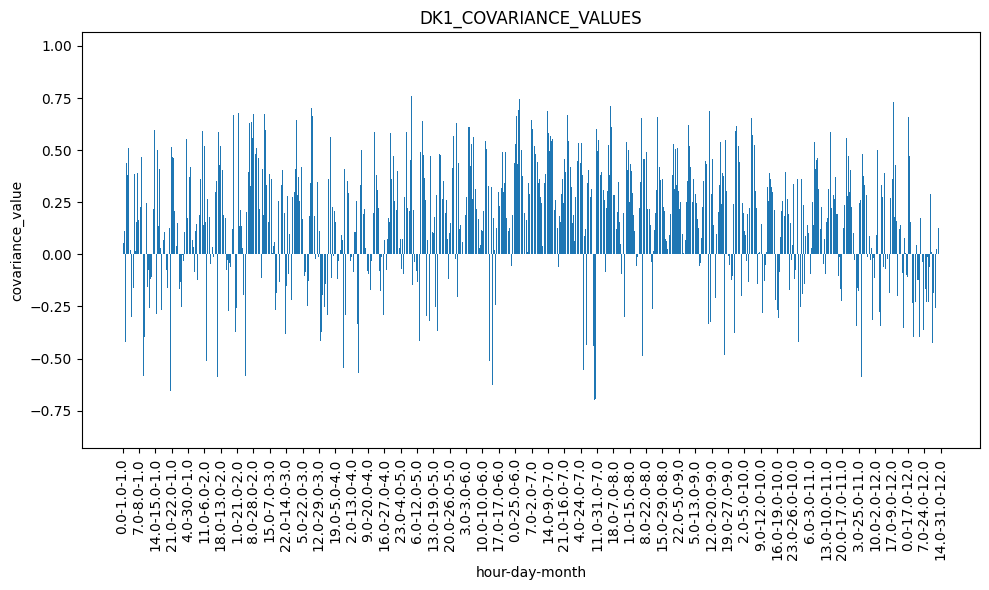

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

x = covariance_df['hour'].astype(str) + "-" + covariance_df['date'].astype(str) + "-" + covariance_df['month'].astype(str)
y = covariance_df['covariance_value_with_DK1']

plt.bar(x, y)
plt.xlabel('hour-day-month')
plt.ylabel('covariance_value')
plt.title('DK1_COVARIANCE_VALUES')

# Reduce the number of x-axis ticks by specifying the step size
step_size = int(len(x) * 0.02)  # 10 percent of the total number of ticks
plt.xticks(range(0, len(x), step_size), x[::step_size], rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping labels

plt.show()


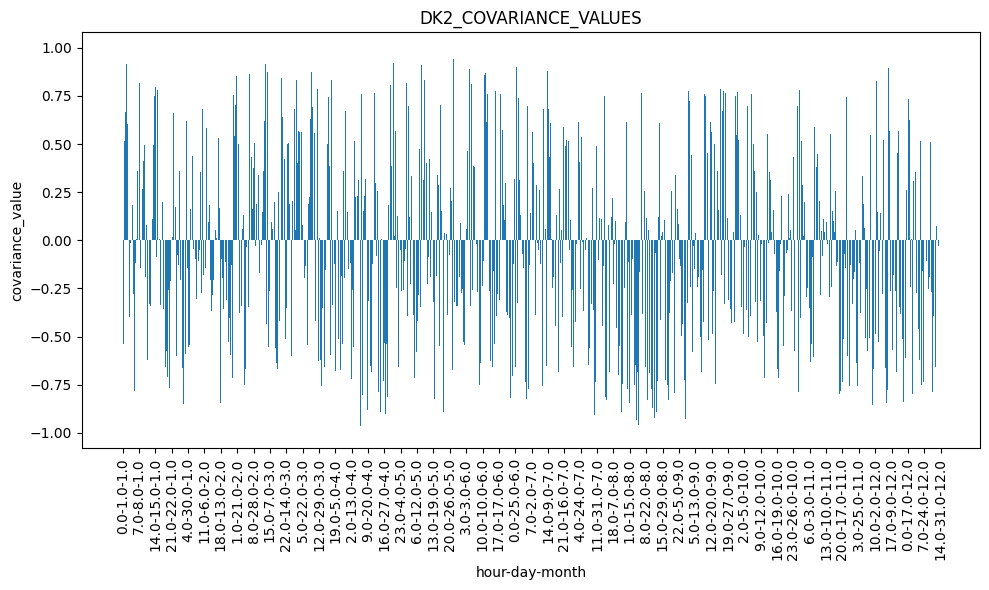

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

x = covariance_df['hour'].astype(str) + "-" + covariance_df['date'].astype(str) + "-" + covariance_df['month'].astype(str)
y = covariance_df['covariance_value_with_DK2']

plt.bar(x, y)
plt.xlabel('hour-day-month')
plt.ylabel('covariance_value')
plt.title('DK2_COVARIANCE_VALUES')

# Reduce the number of x-axis ticks by specifying the step size
step_size = int(len(x) * 0.02)  # 10 percent of the total number of ticks
plt.xticks(range(0, len(x), step_size), x[::step_size], rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping labels

plt.show()

#Calculating Bins

In [ ]:
def process(a):
  if np.isnan(a):
    return 'NaN'
  if (a<=-0.7):
    return 'very strong negative'
  elif (a<=-0.5 and a>=-0.7):
    return 'strong negative'
  elif (a<=-0.3 and a>=-0.5):
    return 'moderate negative'
  elif(a<=0 and a>=-0.3):
    return 'weak negative'
  elif(a<=0.3 and a>=0):
    return 'weak positive'
  elif(a<=0.5 and a>=0.3):
    return 'moderate positive'
  elif(a<=0.7 and a>=0.5):
    return 'strong positive'
  else:
    return 'very strong positive'

In [ ]:
covariance_df['strength_with_DK1']='0'
covariance_df['strength_with_DK2']='0'
for i in range (0,8760):
  covariance_df.loc[i,'strength_with_DK1']=process(covariance_df['covariance_value_with_DK1'].iloc[i])
  covariance_df.loc[i,'strength_with_DK2']=process(covariance_df['covariance_value_with_DK2'].iloc[i])

#Plot the Bin-Bar Graph

<function matplotlib.pyplot.show(close=None, block=None)>

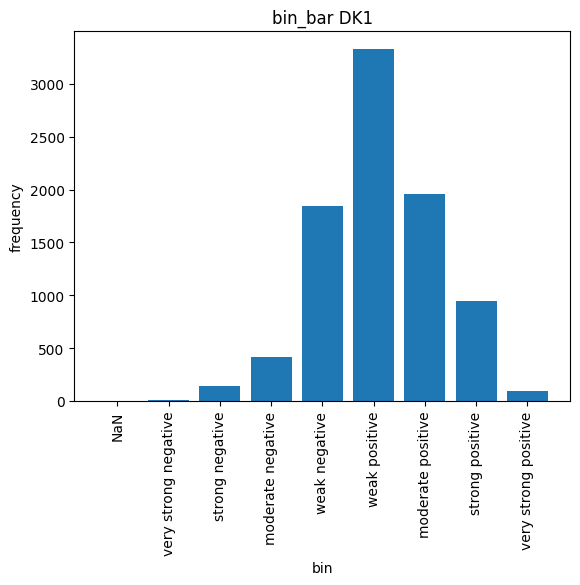

In [ ]:
import matplotlib.pyplot as plt
x=['NaN','very strong negative','strong negative','moderate negative','weak negative','weak positive','moderate positive','strong positive','very strong positive']
y=[(covariance_df['strength_with_DK1']=='Nan').sum(),(covariance_df['strength_with_DK1']=='very strong negative').sum(),
 (covariance_df['strength_with_DK1']=='strong negative').sum(),(covariance_df['strength_with_DK1']=='moderate negative').sum(),(covariance_df['strength_with_DK1']=='weak negative').sum(),(covariance_df['strength_with_DK1']=='weak positive').sum(),(covariance_df['strength_with_DK1']=='moderate positive').sum(),(covariance_df['strength_with_DK1']=='strong positive').sum(),(covariance_df['strength_with_DK1']=='very strong positive').sum()]
plt.bar(x,y)
plt.xlabel('bin')
plt.ylabel('frequency')
plt.title('bin_bar DK1')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

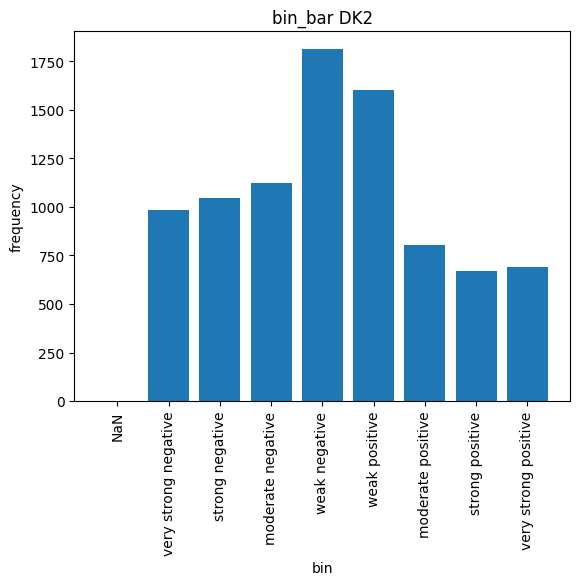

In [ ]:
import matplotlib.pyplot as plt
x=['NaN','very strong negative','strong negative','moderate negative','weak negative','weak positive','moderate positive','strong positive','very strong positive']
y=[(covariance_df['strength_with_DK2']=='Nan').sum(),(covariance_df['strength_with_DK2']=='very strong negative').sum(),
 (covariance_df['strength_with_DK2']=='strong negative').sum(),(covariance_df['strength_with_DK2']=='moderate negative').sum(),(covariance_df['strength_with_DK2']=='weak negative').sum(),(covariance_df['strength_with_DK2']=='weak positive').sum(),(covariance_df['strength_with_DK2']=='moderate positive').sum(),(covariance_df['strength_with_DK2']=='strong positive').sum(),(covariance_df['strength_with_DK2']=='very strong positive').sum()]
plt.bar(x,y)
plt.xlabel('bin')
plt.ylabel('frequency')
plt.title('bin_bar DK2')
plt.xticks(rotation=90)
plt.show

#Highest R value Finding throughout the year

In [ ]:
top_5_max_values=covariance_df['covariance_value_with_DK1'].nlargest(5)
top_5_Max_indices=top_5_max_values.index
top_5_Max_indices

Index([4254, 4253, 4255, 4238, 4252], dtype='int64')

In [ ]:
def make_graph(i):
  x=np.array([mixed_df['values_2018'].iloc[i],mixed_df['values_2019'].iloc[i],mixed_df['values_2020'].iloc[i],mixed_df['values_2021'].iloc[i],mixed_df['values_2022'].iloc[i],mixed_df['values_2023'].iloc[i]])
  y=np.array([producer_mixed_df['2018_values'].iloc[i],producer_mixed_df['2019_values'].iloc[i],producer_mixed_df['2020_values'].iloc[i],producer_mixed_df['2021_values'].iloc[i],producer_mixed_df['2022_values'].iloc[i],producer_mixed_df['2023_values'].iloc[i]])
  plt.scatter(x,y)
  slope,intercept,rvalue,pvalue,stderr=linregress(x,y)
  plt.plot(x,slope*x+intercept)
  plt.title(f"{mixed_df['date'].iloc[i]},{mixed_df['month'].iloc[i]},{mixed_df['hour'].iloc[i]} with {covariance_df['covariance_value_with_DK1'].iloc[i]} covariance value with DK1")
  plt.savefig(f"graph_{i}.png")
  plt.show()

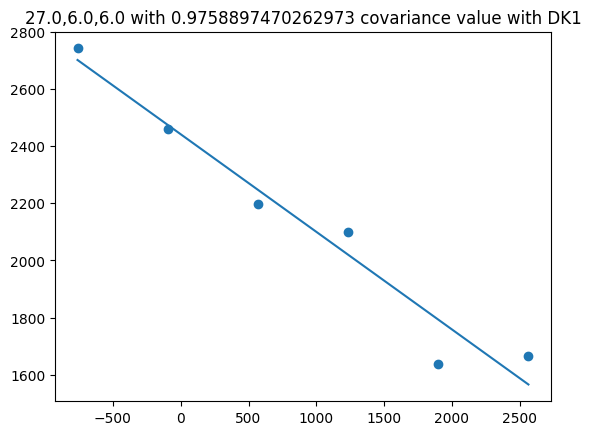

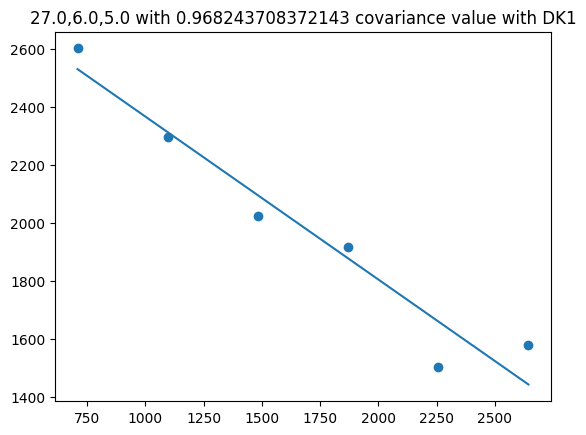

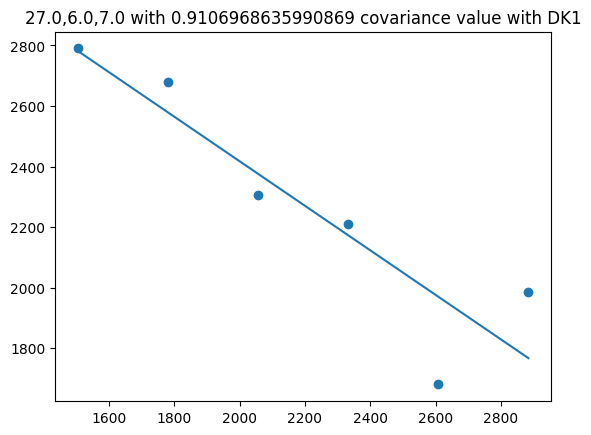

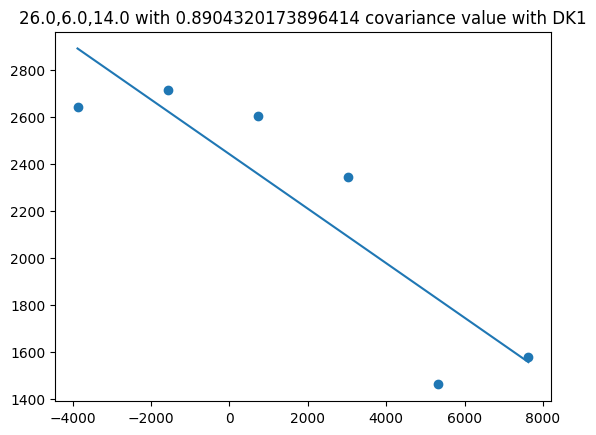

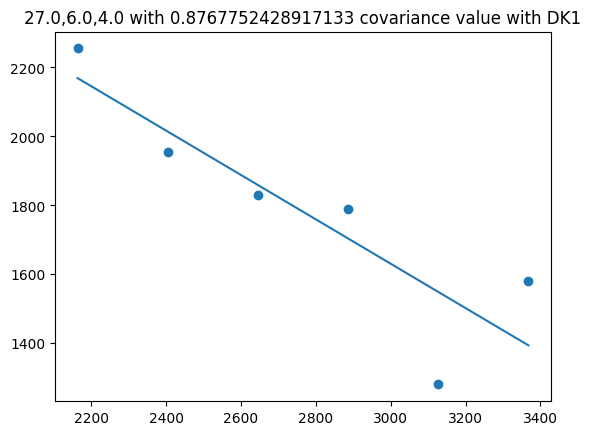

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from scipy.stats import linregress
!pip install scipy
for i in range (0,5):
  make_graph(top_5_Max_indices[i])

In [ ]:
top_5_max_values2=covariance_df['covariance_value_with_DK2'].nlargest(5)
top_5_Max_indices2=top_5_max_values2.index
top_5_Max_indices2

Index([3206, 40, 3203, 3205, 3204], dtype='int64')

In [ ]:
def make_graph(i):
  x=np.array([mixed_df['values_2018'].iloc[i],mixed_df['values_2019'].iloc[i],mixed_df['values_2020'].iloc[i],mixed_df['values_2021'].iloc[i],mixed_df['values_2022'].iloc[i],mixed_df['values_2023'].iloc[i]])
  y=np.array([producer_mixed_df2['2018_values'].iloc[i],producer_mixed_df2['2019_values'].iloc[i],producer_mixed_df2['2020_values'].iloc[i],producer_mixed_df2['2021_values'].iloc[i],producer_mixed_df2['2022_values'].iloc[i],producer_mixed_df2['2023_values'].iloc[i]])
  plt.scatter(x,y)
  slope,intercept,rvalue,pvalue,stderr=linregress(x,y)
  plt.plot(x,slope*x+intercept)
  plt.title(f"{mixed_df['date'].iloc[i]},{mixed_df['month'].iloc[i]},{mixed_df['hour'].iloc[i]} with {covariance_df['covariance_value_with_DK2'].iloc[i]} covariance value with DK2")
  plt.savefig(f"graph_{i}.png")
  plt.show()

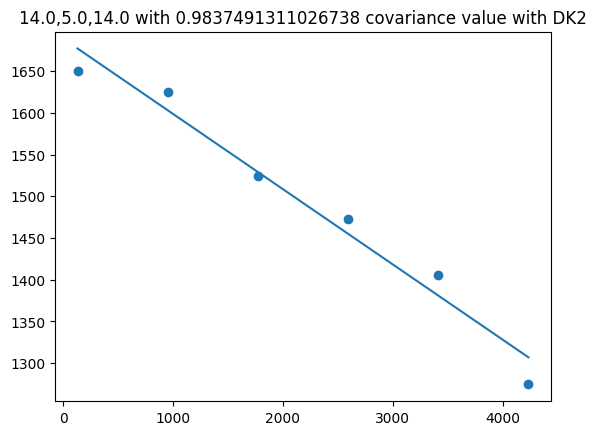

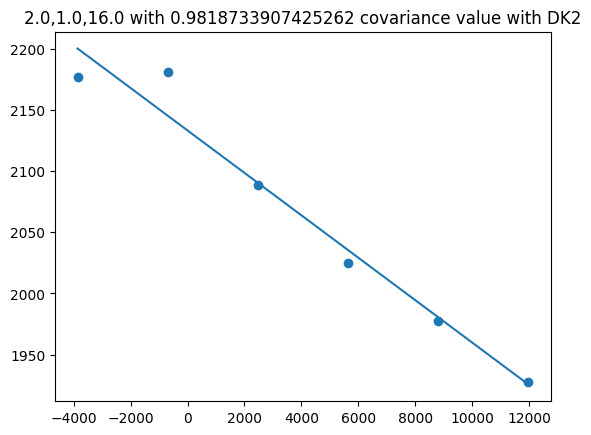

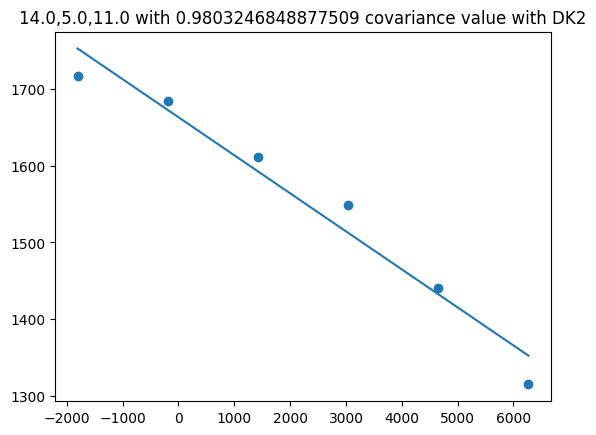

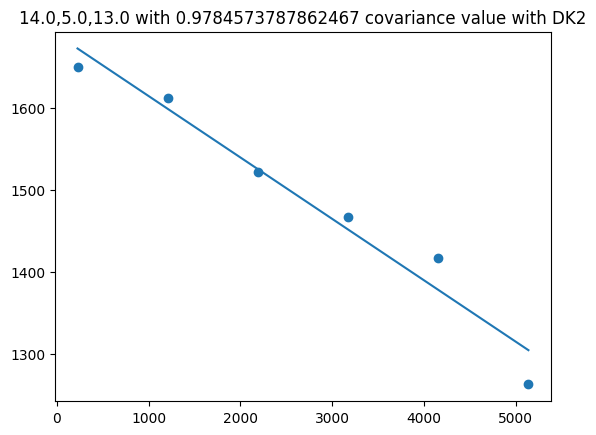

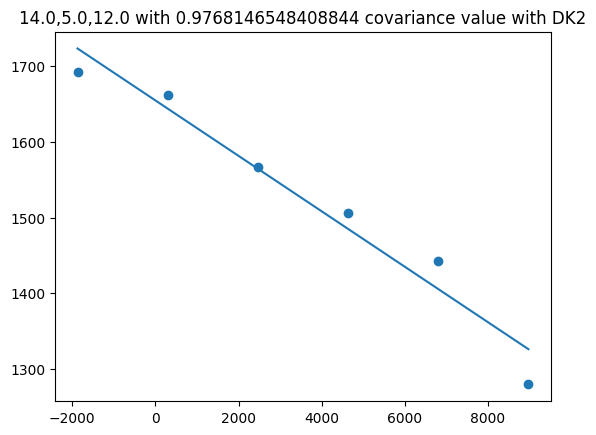

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from scipy.stats import linregress
!pip install scipy
for i in range (0,5):
  make_graph(top_5_Max_indices2[i])

# Quantile plot over the year

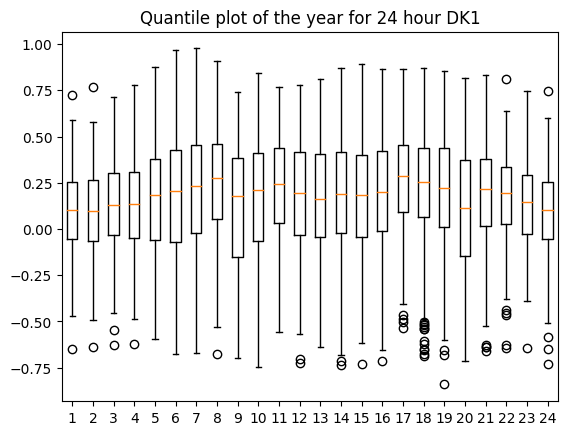

In [ ]:
covariance_df['month'] = covariance_df['month'].astype(int)
covariance_df['hour'] = covariance_df['hour'].astype(int)
import numpy as np
import matplotlib.pyplot as plt
datasets=[]
for i in range (0,24):
  dataset=np.array(covariance_df[covariance_df['hour']==i]['covariance_value_with_DK1'])
  dataset=dataset[~np.isnan(dataset)]
  datasets.append(dataset)
plt.title("Quantile plot of the year for 24 hour DK1")
plt.boxplot(datasets)
plt.show()

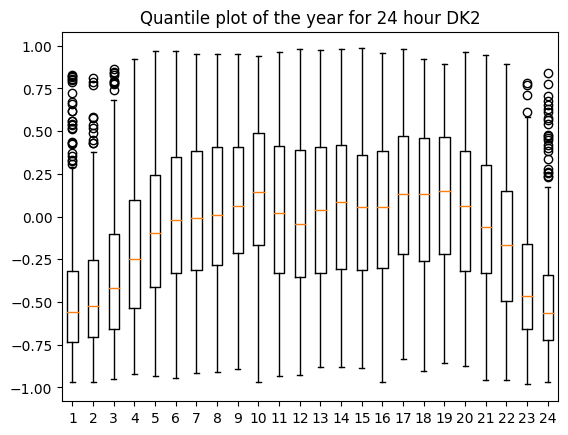

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
datasets=[]
for i in range (0,24):
  dataset=np.array(covariance_df[covariance_df['hour']==i]['covariance_value_with_DK2'])
  dataset=dataset[~np.isnan(dataset)]
  datasets.append(dataset)
plt.title("Quantile plot of the year for 24 hour DK2")
plt.boxplot(datasets)
plt.show()

#Quantile Plot over the months with thier Highest R value

The data for the month 1
518    0.753901
Name: covariance_value_with_DK1, dtype: float64


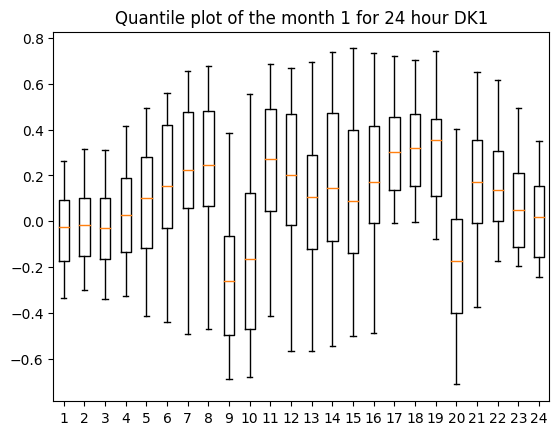

The data for the month 2
1190    0.758242
Name: covariance_value_with_DK1, dtype: float64


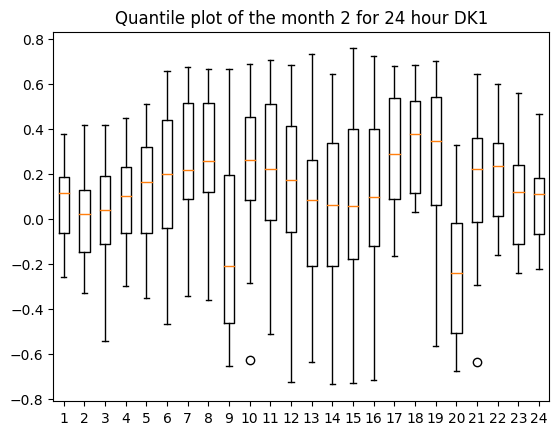

The data for the month 3
1524    0.81266
Name: covariance_value_with_DK1, dtype: float64


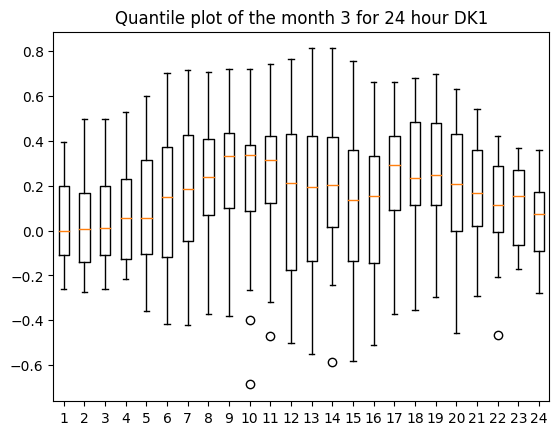

The data for the month 4
2862    0.7233
Name: covariance_value_with_DK1, dtype: float64


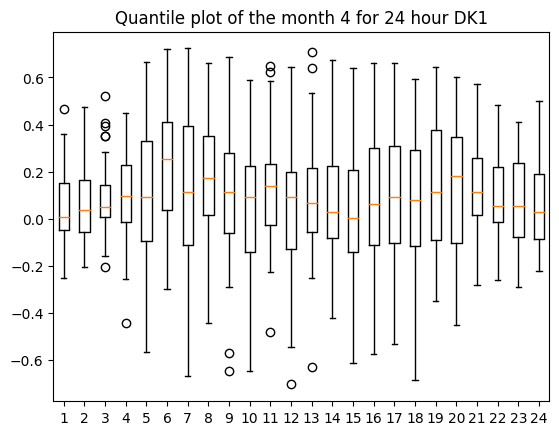

The data for the month 5
3557    0.799504
Name: covariance_value_with_DK1, dtype: float64


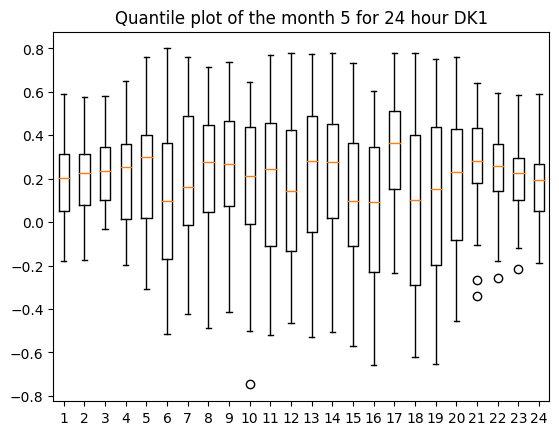

The data for the month 6
4254    0.97589
Name: covariance_value_with_DK1, dtype: float64


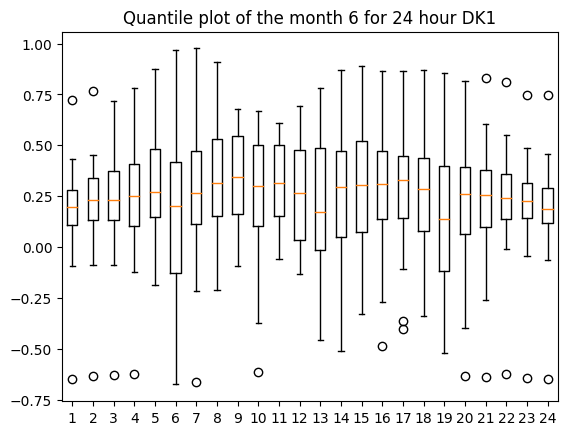

The data for the month 7
4548    0.75386
Name: covariance_value_with_DK1, dtype: float64


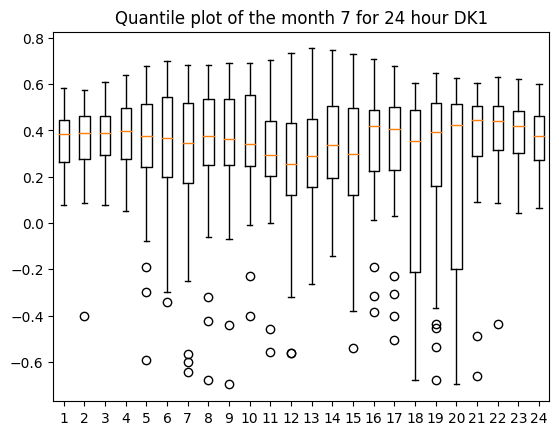

The data for the month 8
5218    0.722476
Name: covariance_value_with_DK1, dtype: float64


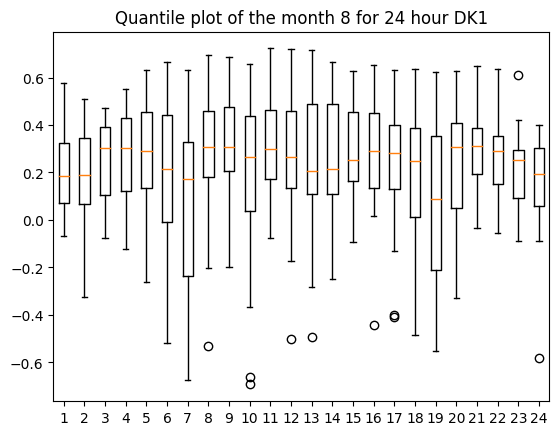

The data for the month 9
6273    0.845484
Name: covariance_value_with_DK1, dtype: float64


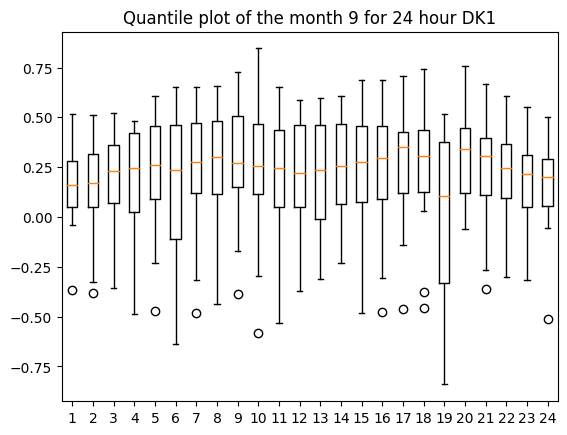

The data for the month 10
6725    0.694605
Name: covariance_value_with_DK1, dtype: float64


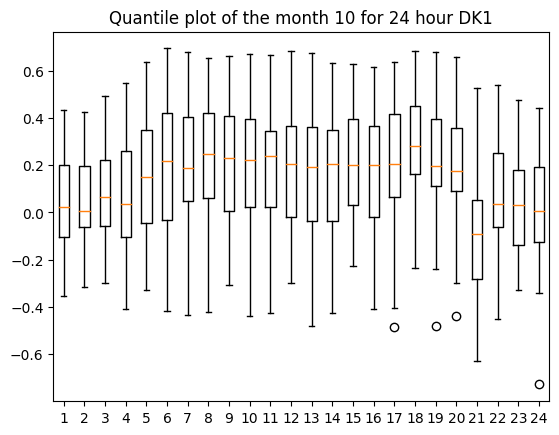

The data for the month 11
7566    0.626934
Name: covariance_value_with_DK1, dtype: float64


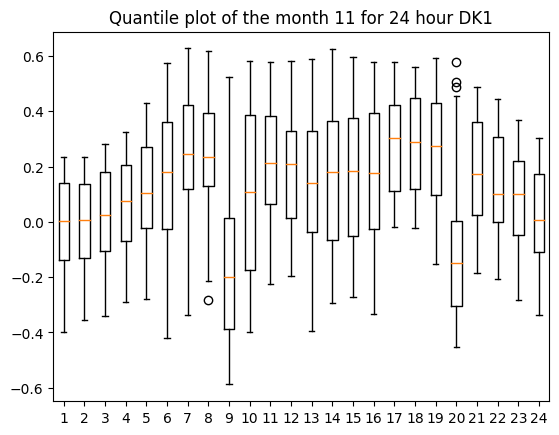

The data for the month 12
8247    0.742739
Name: covariance_value_with_DK1, dtype: float64


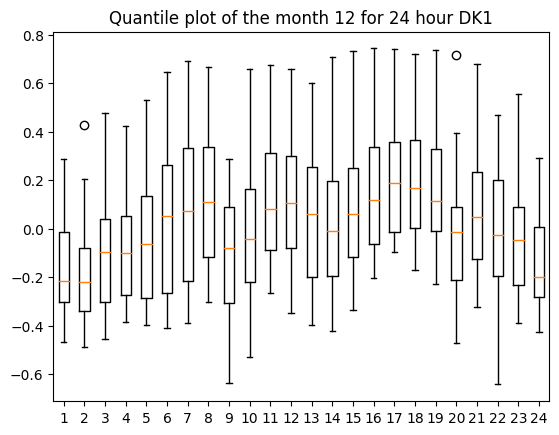

In [ ]:
for j in range (1,13):
  print(f"The data for the month {j}")
  top_index=(covariance_df[covariance_df['month']==j]['covariance_value_with_DK1'].nlargest(1)).index
  print(covariance_df['covariance_value_with_DK1'].iloc[top_index])
  df_month=covariance_df[covariance_df['month']==j]
  datasets=[]
  for i in range (0,24):
    dataset=np.array(df_month[df_month['hour']==i]['covariance_value_with_DK1'])
    dataset=dataset[~np.isnan(dataset)]
    datasets.append(dataset)
  plt.title(f"Quantile plot of the month {j} for 24 hour DK1")
  plt.boxplot(datasets)
  plt.show()

The data for the month 1
40    0.981873
Name: covariance_value_with_DK2, dtype: float64


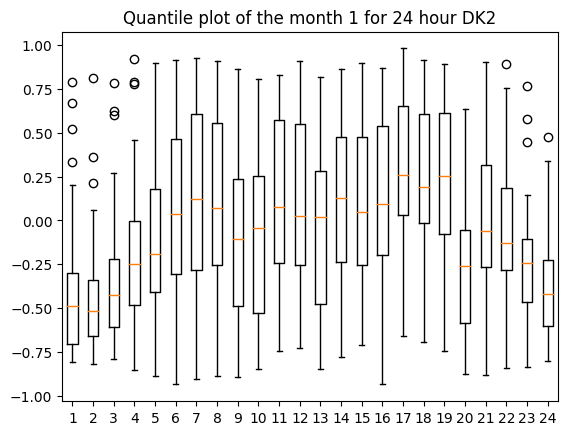

The data for the month 2
1352    0.951418
Name: covariance_value_with_DK2, dtype: float64


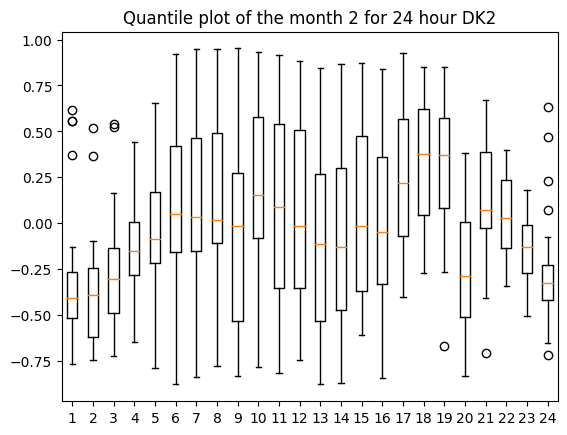

The data for the month 3
1526    0.96658
Name: covariance_value_with_DK2, dtype: float64


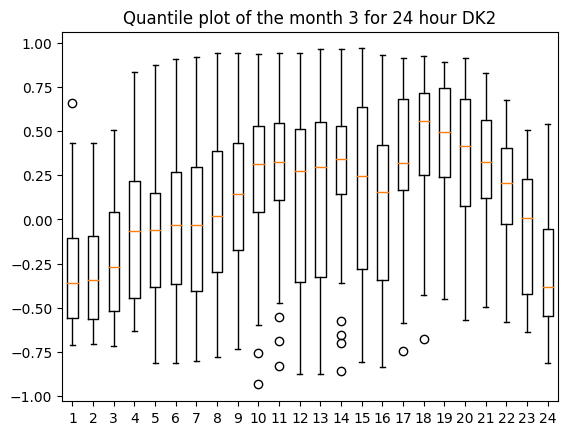

The data for the month 4
2861    0.969854
Name: covariance_value_with_DK2, dtype: float64


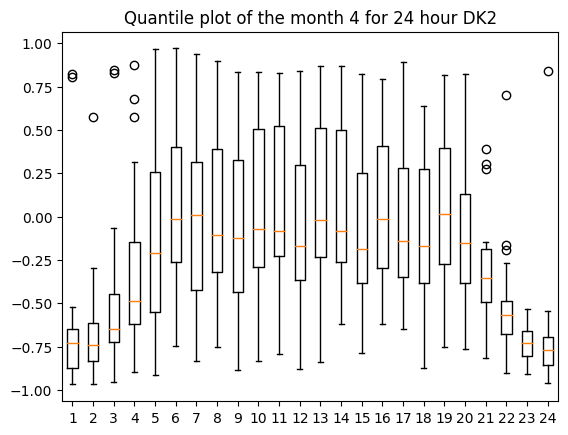

The data for the month 5
3206    0.983749
Name: covariance_value_with_DK2, dtype: float64


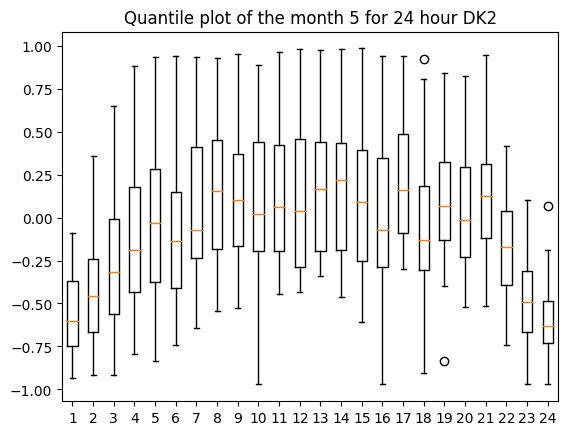

The data for the month 6
4123    0.96262
Name: covariance_value_with_DK2, dtype: float64


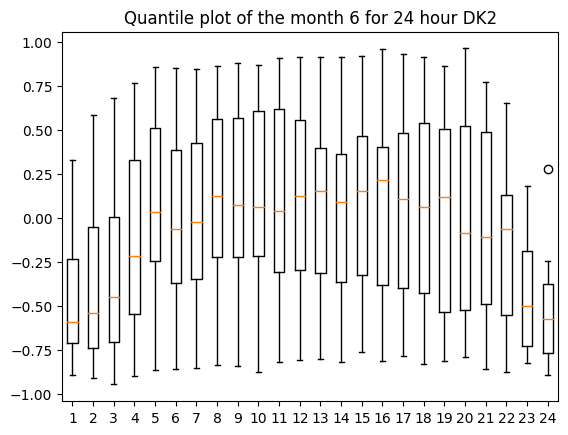

The data for the month 7
4549    0.93241
Name: covariance_value_with_DK2, dtype: float64


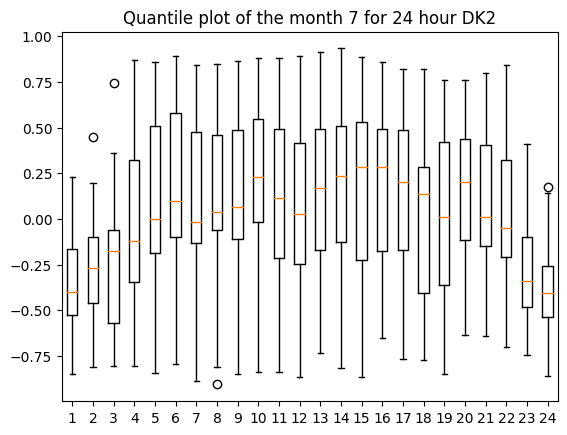

The data for the month 8
5340    0.866769
Name: covariance_value_with_DK2, dtype: float64


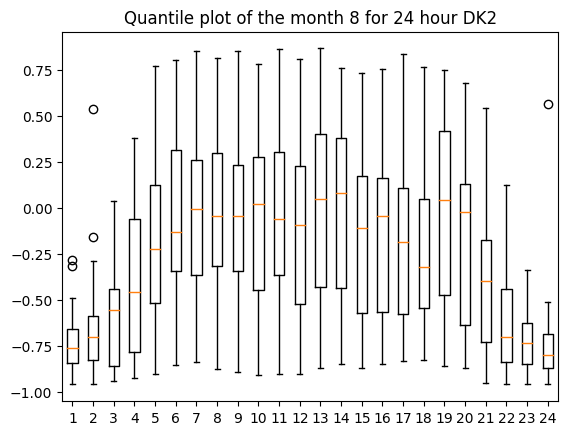

The data for the month 9
6392    0.864069
Name: covariance_value_with_DK2, dtype: float64


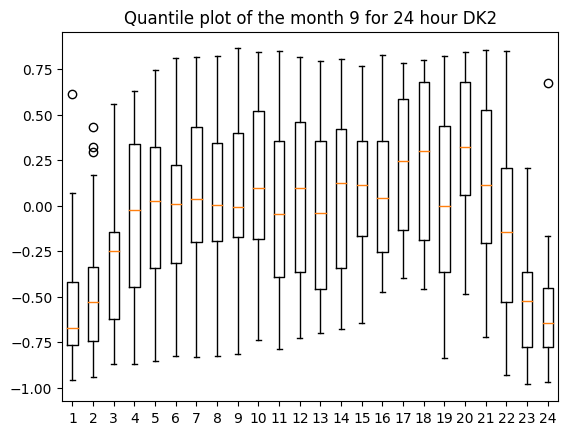

The data for the month 10
6569    0.89783
Name: covariance_value_with_DK2, dtype: float64


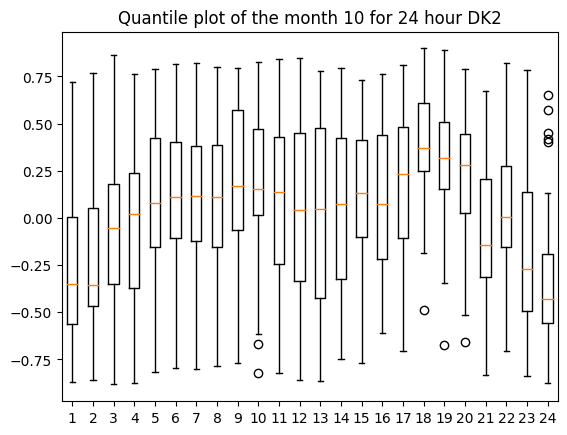

The data for the month 11
7688    0.89465
Name: covariance_value_with_DK2, dtype: float64


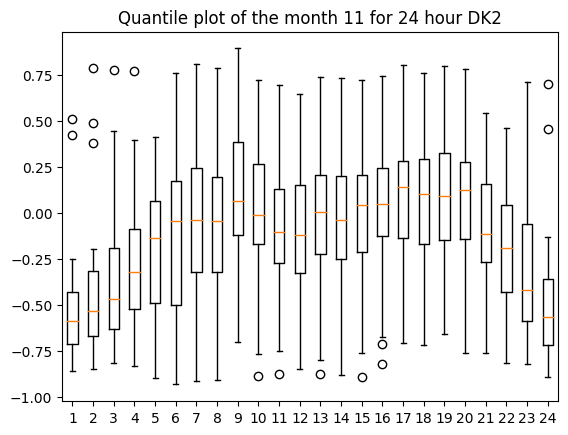

The data for the month 12
8361    0.934385
Name: covariance_value_with_DK2, dtype: float64


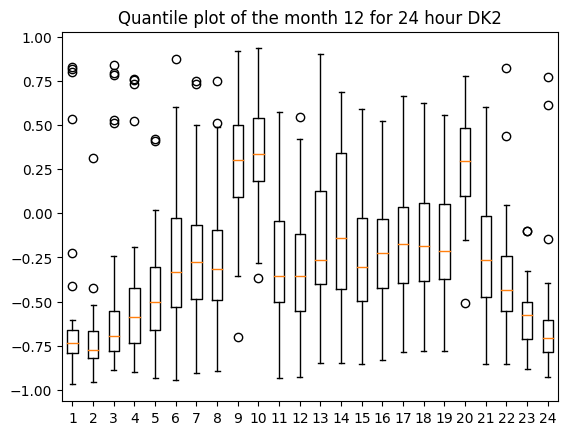

In [ ]:
for j in range (1,13):
  print(f"The data for the month {j}")
  top_index=(covariance_df[covariance_df['month']==j]['covariance_value_with_DK2'].nlargest(1)).index
  print(covariance_df['covariance_value_with_DK2'].loc[top_index])
  df_month=covariance_df[covariance_df['month']==j]
  datasets=[]
  for i in range (0,24):
    dataset=np.array(df_month[df_month['hour']==i]['covariance_value_with_DK2'])
    dataset=dataset[~np.isnan(dataset)]
    datasets.append(dataset)
  plt.title(f"Quantile plot of the month {j} for 24 hour DK2")
  plt.boxplot(datasets)
  plt.show()

# Table on which day both factories where available

In [ ]:
import pandas as pd

high_correlation_days = pd.DataFrame(index=range(36), columns=['date', 'month', 'is_correlated_with_DK1'])

for i in range(0, 365):
    date_index = i * 24
    count = 0
    date = covariance_df['date'].iloc[date_index]
    month = covariance_df['month'].iloc[date_index]
    for j in range(0, 24):
      hour_index = date_index + j
      if covariance_df['covariance_value_with_DK1'].iloc[hour_index] > 0.5:
          count += 1
    if count > 12:
          is_correlated_DK1 = 1
    else:
          is_correlated_DK1 = 0
    count=0
    for j in range(0, 24):
          hour_index = date_index + j
          if covariance_df['covariance_value_with_DK2'].iloc[hour_index] > 0.5:
              count += 1
    if count > 12:
          is_correlated_DK2 = 1
    else:
          is_correlated_DK2 = 0
    is_correlated=0
    if (is_correlated_DK1==1 and is_correlated_DK2==1):
        is_correlated=1
    high_correlation_days.loc[i, 'date'] = date
    high_correlation_days.loc[i, 'month'] = month
    high_correlation_days.loc[i, 'is_correlated_with_DK1'] = is_correlated_DK1
    high_correlation_days.loc[i, 'is_correlated_with_DK2'] = is_correlated_DK2
    high_correlation_days.loc[i, 'with both'] = is_correlated
    if (is_correlated==1):
      print(high_correlation_days['month'].iloc[i],high_correlation_days['date'].iloc[i])

1 8.0
2 5.0
2 26.0
3 5.0
3 19.0
3 26.0
5 14.0
5 28.0
6 4.0
6 11.0
6 18.0
6 25.0
6 26.0
7 2.0
7 9.0
7 17.0
8 6.0
8 27.0
9 3.0
9 10.0
9 24.0
10 1.0
10 2.0
10 8.0
11 12.0


# Table on which hour both factories where available

In [ ]:
import pandas as pd

high_correlation_hours = pd.DataFrame(columns=['hours', 'month', 'is_correlated_with_DK1','is_correlated_with_DK2'])

for i in range(1, 13):
    for j in range(0, 24):
        new_df_hour = covariance_df[(covariance_df['month'] == i) & (covariance_df['hour'] == j)]
        count = 0
        final_index=((24*(i-1))+j)
        high_correlation_hours.loc[final_index, 'month'] = i
        high_correlation_hours.loc[final_index, 'hours'] = j
        for index, row in new_df_hour.iterrows():
            if row['covariance_value_with_DK1'] > 0.5:
                count = count + 1
        if count > 7:
          high_correlation_hours.loc[final_index, 'is_correlated_with_DK1'] = 1
        else:
          high_correlation_hours.loc[final_index, 'is_correlated_with_DK1'] = 0
        count=0
        for index, row in new_df_hour.iterrows():
            if row['covariance_value_with_DK2'] > 0.5:
                count = count + 1
        if count > 7:
          high_correlation_hours.loc[final_index, 'is_correlated_with_DK2'] = 1
        else:
          high_correlation_hours.loc[final_index, 'is_correlated_with_DK2'] = 0
        if (high_correlation_hours.iloc[final_index]['is_correlated_with_DK1']==1 & high_correlation_hours.iloc[final_index]['is_correlated_with_DK2']==1):
          print(i," ", j)
high_correlation_hours

1   7
1   10
2   10
2   16
2   17
2   18
3   17
5   16
6   7
6   8
6   9
6   10
7   4
7   5
7   6
7   9
7   13
7   14


,hours,month,is_correlated_with_DK1,is_correlated_with_DK2
0,0,1,0,0
1,1,1,0,0
2,2,1,0,0
3,3,1,0,0
4,4,1,0,0
...,...,...,...,...
283,19,12,0,1
284,20,12,0,0
285,21,12,0,0
286,22,12,0,0
